In [ ]:
# Weeks 9 & 10 Exercises
## Justin Wisniewski

In [ ]:
# Activity 9

In [18]:
# Import necessary libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [19]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [20]:
# Read the HTML from the URL and pass on to BeautifulSoup
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

In [21]:
# Write a small function to check the status of the web request
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [22]:
status_check(response)

Success!


1

In [23]:
# Decode response and pass on to BeautifulSoup
contents = response.content.decode(response.encoding)

In [24]:
soup = BeautifulSoup(contents, 'html.parser')

In [25]:
# Empty list to hold all the http links in the HTML page
lst_links=[]

In [26]:
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    # Print(link.get('href'))
    lst_links.append(link.get('href'))

In [27]:
lst_links[:40]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/2641',
 '/ebooks/145',
 '/ebooks/37106',
 '/ebooks/16389',
 '/ebooks/67979',
 '/ebooks/100',
 '/ebooks/2701']

In [28]:
# Initialize the empty list to hold the file numbers
booknum=[]

In [29]:
for i in range(33,133):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [30]:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[2641, 145, 37106, 16389, 67979, 100, 2701, 394, 6761, 2160, 4085, 6593, 1259, 5197, 84, 1342, 25344, 46, 345, 11, 1661, 2542, 43, 174, 69314, 64317, 1952, 98, 20228, 844, 69313, 1260, 1080, 69311, 1400, 23, 76, 5200, 69308, 2554, 2591, 41, 69310, 219, 408, 4300, 28054, 1232, 2600, 2852, 158, 120, 6130, 205, 45031, 1184, 996, 3207, 55, 1727, 768, 74, 203, 1497, 2814, 69307, 45, 58585, 16, 244, 7370, 160, 3825, 514, 135, 31284, 215, 1399, 35, 852, 10007, 30254, 42324, 779, 4363, 2148, 236, 69316, 20203, 43453, 521, 35899, 1250, 27827, 69315, 42108, 16328, 105, 730, 33283]


In [31]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-11-08265146
last 7 days534791
last 30 days6122400



Top 100 EBooks yesterda

In [32]:
# Search in the extracted text to find the names of the top 100
# Temp empty list of Ebook names
lst_titles_temp=[]

In [33]:
# Create a starting index
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

In [34]:
# Loop 1-100 to add strings of the next 100 lines to this temp list
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

In [35]:
# Use a regular expression to extract only text from name strings and append it to an empty list
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [36]:
# Print list of titles
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

A Room with a View by E
Middlemarch by George Eliot 
Little Women
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
The Complete Works of William Shakespeare by William Shakespeare 
Moby Dick
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Ferdinand Count Fathom 
The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
History of Tom Jones
Twenty Years After by Alexandre Dumas 
My Life 
Frankenstein
Pride and Prejudice by Jane Austen 
The Scarlet Letter by Nathaniel Hawthorne 
A Christmas Carol in Prose
Dracula by Bram Stoker 
Alice
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
A Doll
The Strange Case of Dr
The Picture of Dorian Gray by Oscar Wilde 
The death crystal by George O
The Great Gatsby by F
The Yellow Wallpaper by Charlotte Perkins Gilman 
A Tale of Two Cities by Charles Dickens 
Noli Me Tangere by Jos
The Importance of Being Earnest
Volume of anecdotes
Jane Eyre
A Modest Proposal by Jonathan Swif

In [ ]:
# Activity 10

In [1]:
import urllib.request, urllib.parse, urllib.error
import json

In [6]:
# Load the secret API key and store it
with open('APIkeys.json') as f:
    keys = json.load(f)

In [11]:
# Create a variable called apikey
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey=87c4ca17'

In [12]:
# Write a utility function to print the movie data
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [13]:
# Write a utility function to download a poster of the movie
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [14]:
# Create search movie function
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [17]:
# Test search movie function
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=87c4ca17
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,164,233
imdbID: tt0120338
--------------------------------------------------


In [16]:
# Test random error
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=87c4ca17
Error encountered:  Movie not found!


In [ ]:
# Twitter API and do a simple data pull

In [1]:
import twitter
api = twitter.Api(consumer_key='FdBIOqAQTL2XUeRFlACWVBRB5',
  consumer_secret='S3vPWGcZUxOKfsqdcXd7WV7eTYUJVTQwOgeuzfO1Qsj5l9bnBs',
    access_token_key='172071834-XieR0KZ3k0293wASXhE8VIUI3RvWGolpoSoYPAMm',
    access_token_secret='nHV8X8ldsHi7fITtw25hxrOn2Nk8KbDL5PRSot1mkSlcV')

In [4]:
print(api.VerifyCredentials())

TwitterError: [{'message': 'You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve', 'code': 453}]

In [5]:
# Waiting for elevated access to pull my user timeline
statuses = api.GetUserTimeline(screen_name='itsjustinwiz')
print([s.text for s in statuses])

TwitterError: [{'message': 'You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve', 'code': 453}]

In [ ]:
# Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 visualizations to complete

In [6]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [11]:
# Load data using Pandas library
data = pd.read_csv("Term Project.csv")

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

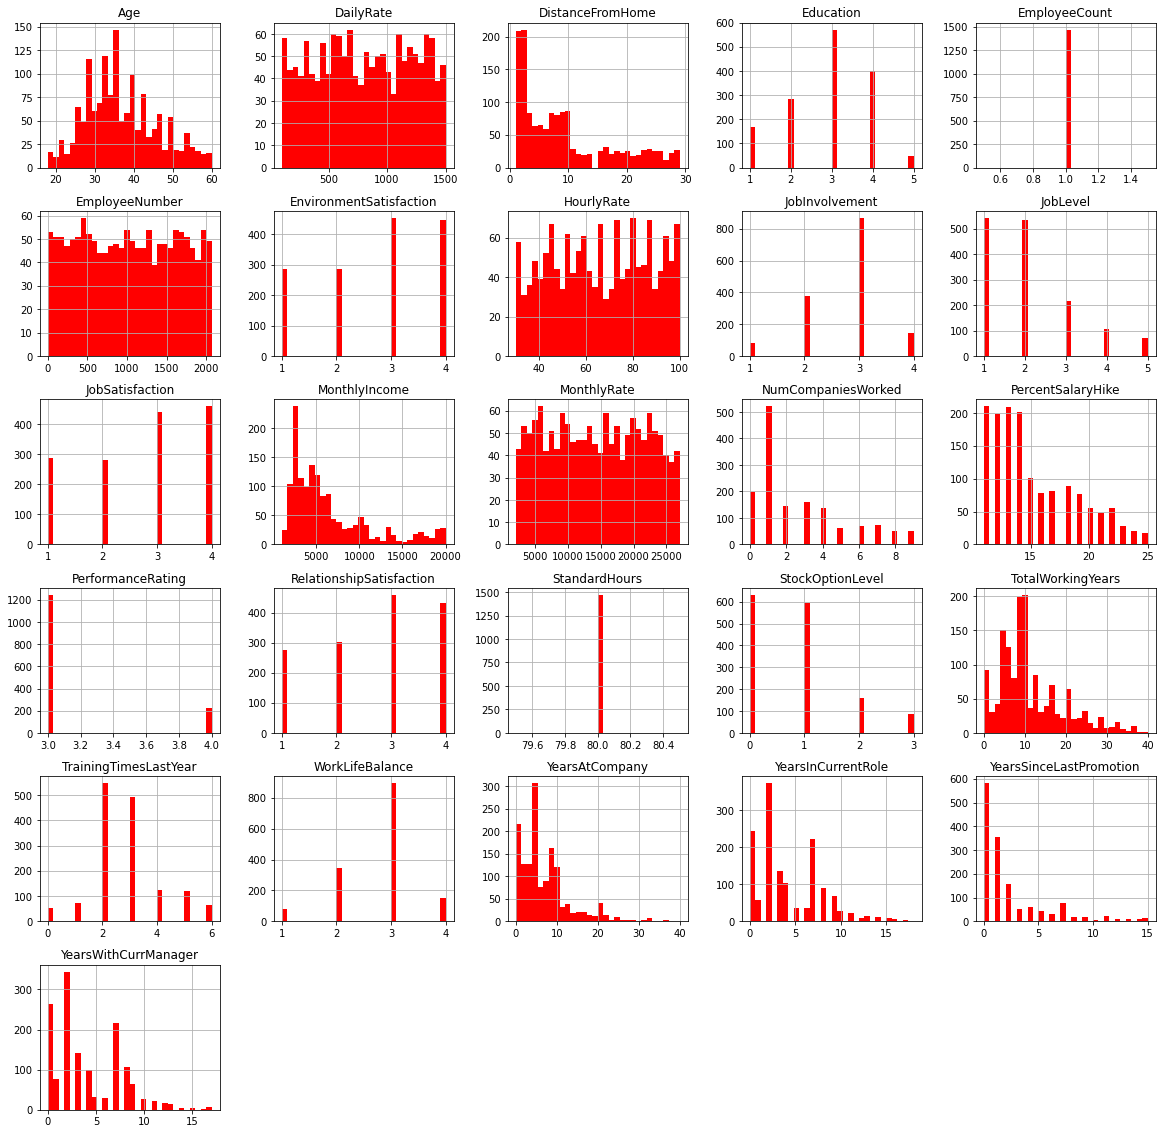

In [13]:
# Histogram
data.hist(bins = 30, figsize = (20,20), color = 'r')

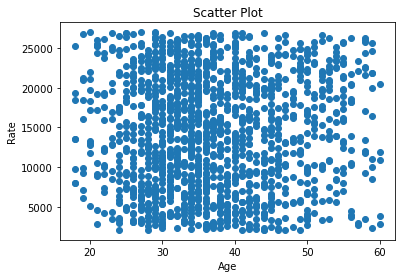

In [15]:
# Scatter plot with age against monthly rate
plt.scatter(data['Age'], data['MonthlyRate'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Age')
plt.ylabel('Rate')
 
plt.show()

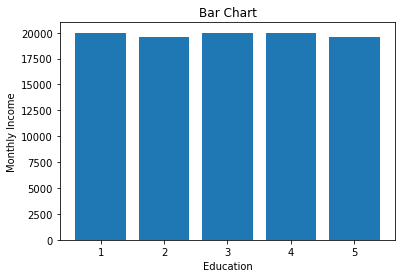

In [17]:
# Bar chart with education against monthly income
plt.bar(data['Education'], data['MonthlyIncome'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('Education')
plt.ylabel('Monthly Income')
 
# Adding the legends
plt.show()